# **MUSHROOM PREDICTION(POSIONOUS OR EDIBLE??)**
* The objective of this competiton is to predict whether the mushroom is poisonous or edible. 
* There are 22 features like cap diameter, cap-shape, gill-color, gill-shape etc and approx 3116945 rows.
* Matthews correlation coefficient was used for evaluation in this competition.
* XGBOOST with MCC of 0.98492 on public leaderboard(20% of test data) and 0.98478 on private leaderboard(80% of test data).
* Ranked in top 25% in this competiton.


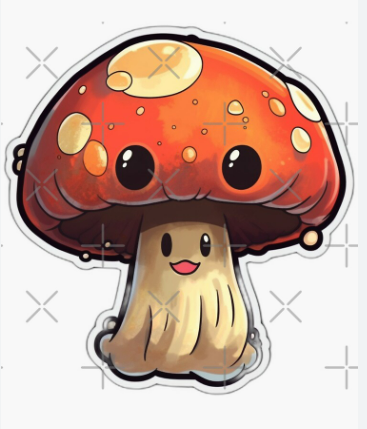

# **LOADING DATA**

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
#Converting to dataframe
df=pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df.head()
df2=pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [3]:
#Droping the id column
df=df.drop(['id'],axis=1)


In [4]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
df.shape

(3116945, 21)

**CHECKING THE NULL VALUES**


In [6]:
df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [7]:
null_counts = df.isnull().sum()
total_elements = df.shape[0]  # Number of rows
null_percentage = (null_counts / total_elements) * 100
null_percentage

class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

# **EXPLORATORY DATA ANALYSIS**

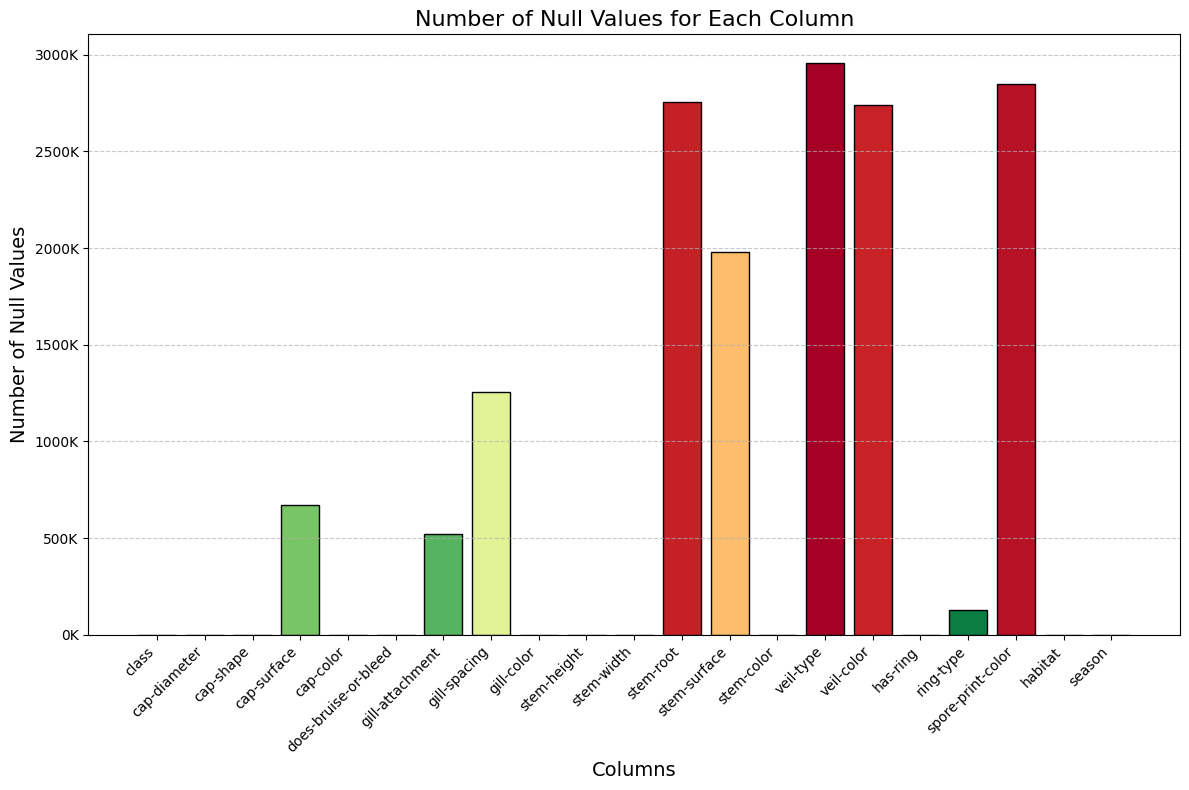

In [8]:
#BAR CHART OF MISSING VALUES
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

null_counts = df.isnull().sum()

norm = plt.Normalize(null_counts.min(), null_counts.max())

colors = plt.cm.RdYlGn_r(norm(null_counts))  

# Plot a bar chart
plt.figure(figsize=(12, 8))
plt.bar(null_counts.index, null_counts.values, color=colors, edgecolor='black')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.title('Number of Null Values for Each Column', fontsize=16)


plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()


* *As you can see there are many null values from the graph which need to be taken care of.*

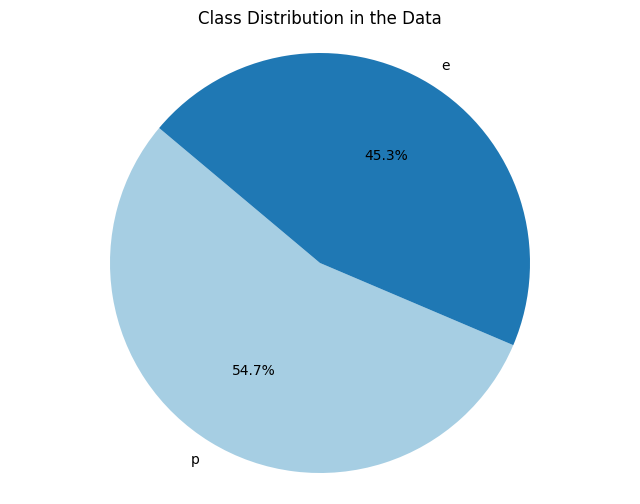

In [9]:
#PIE CHART OF THE TARGET LABELS IN THE DATA
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()


plt.figure(figsize=(8, 6))  
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Class Distribution in the Data')
plt.axis('equal')  
plt.show()


* *Here the data is not imbalanced.*

In [10]:
import warnings

warnings.filterwarnings("ignore")


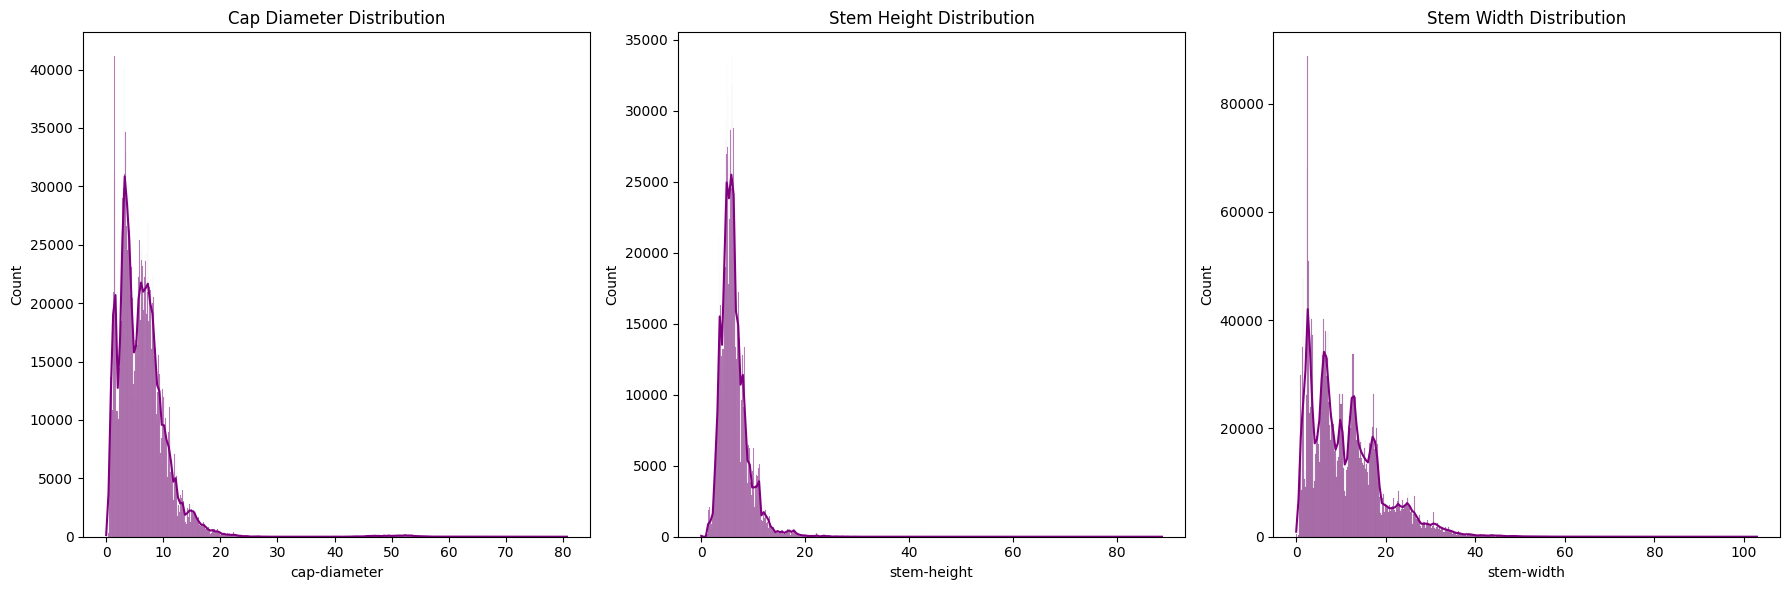

In [11]:
#HISTOGRAMS FOR NUMERICAL DATA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['cap-diameter'], kde=True, color='purple')
plt.title('Cap Diameter Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['stem-height'], kde=True, color='purple')
plt.title('Stem Height Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['stem-width'], kde=True, color='purple')
plt.title('Stem Width Distribution')

plt.tight_layout()
plt.show()



* *Here the numerical features are somewhat right skewed.*

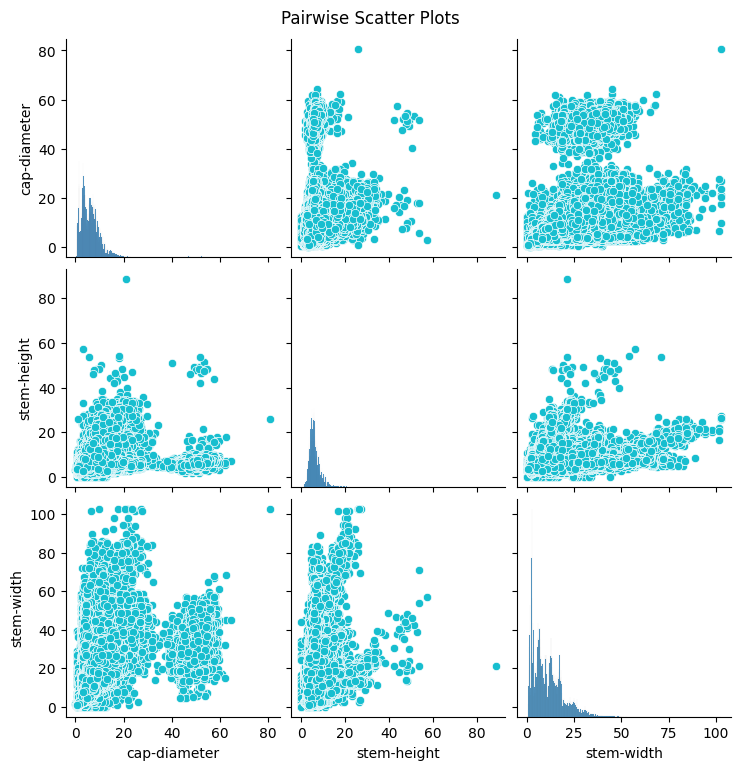

In [12]:
#Pair Plot
sns.pairplot(df[['cap-diameter', 'stem-height', 'stem-width']], plot_kws={'color': '#17becf'})
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


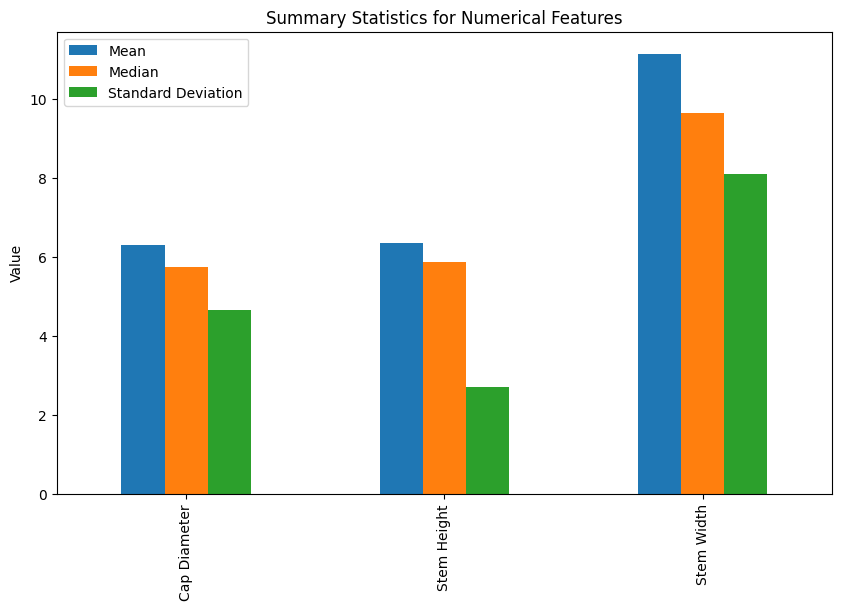

In [13]:
#SUMMARY STATITICS
summary_stats = pd.DataFrame({
    'Mean': [df['cap-diameter'].mean(), df['stem-height'].mean(), df['stem-width'].mean()],
    'Median': [df['cap-diameter'].median(), df['stem-height'].median(), df['stem-width'].median()],
    'Standard Deviation': [df['cap-diameter'].std(), df['stem-height'].std(), df['stem-width'].std()]
}, index=['Cap Diameter', 'Stem Height', 'Stem Width'])

# Plot
summary_stats.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Summary Statistics for Numerical Features')
plt.ylabel('Value')
plt.show()


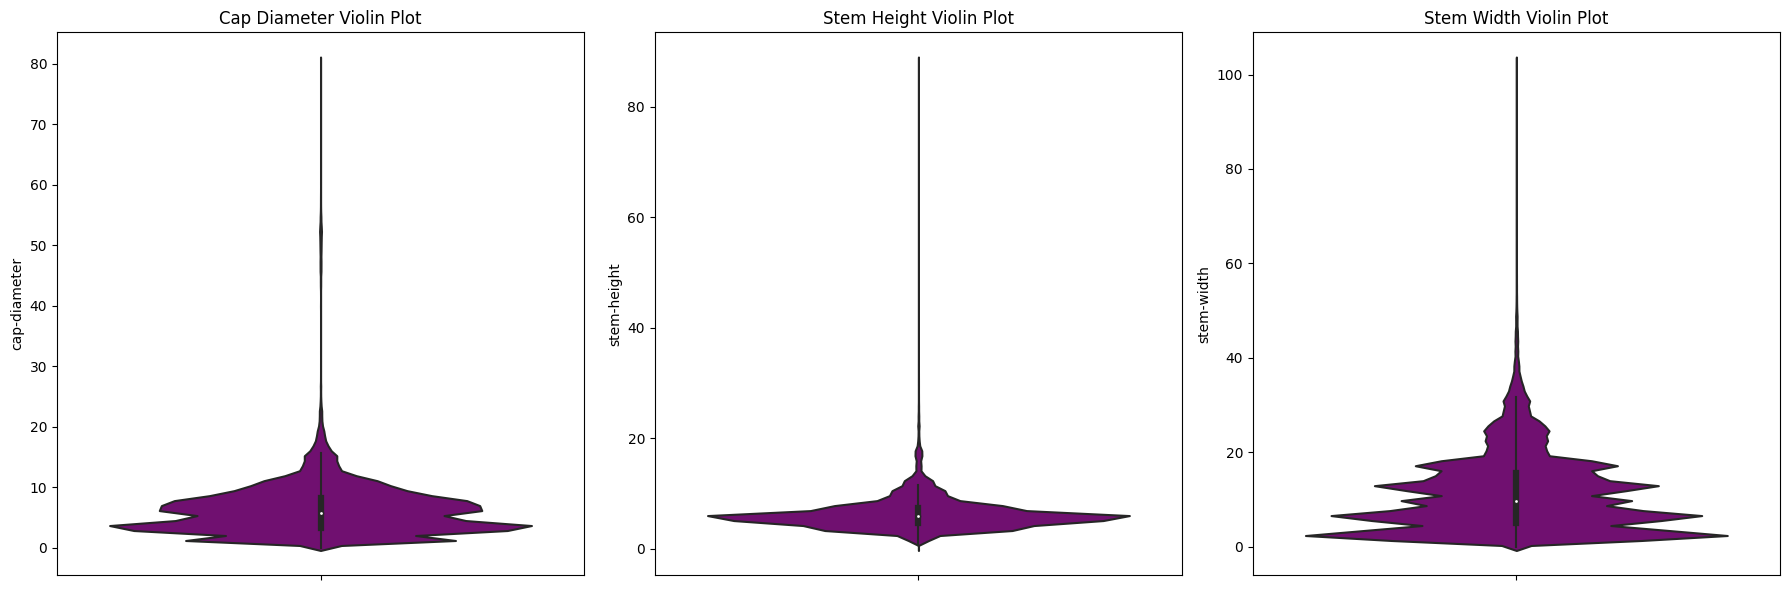

In [14]:
#VIOLIN PLOT
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.violinplot(y=df['cap-diameter'], color='purple')
plt.title('Cap Diameter Violin Plot')

plt.subplot(1, 3, 2)
sns.violinplot(y=df['stem-height'], color='purple')
plt.title('Stem Height Violin Plot')

plt.subplot(1, 3, 3)
sns.violinplot(y=df['stem-width'], color='purple')
plt.title('Stem Width Violin Plot')

plt.tight_layout()
plt.show()


* *These plots help to visualise where the majority of data lies for these 3 features.* 

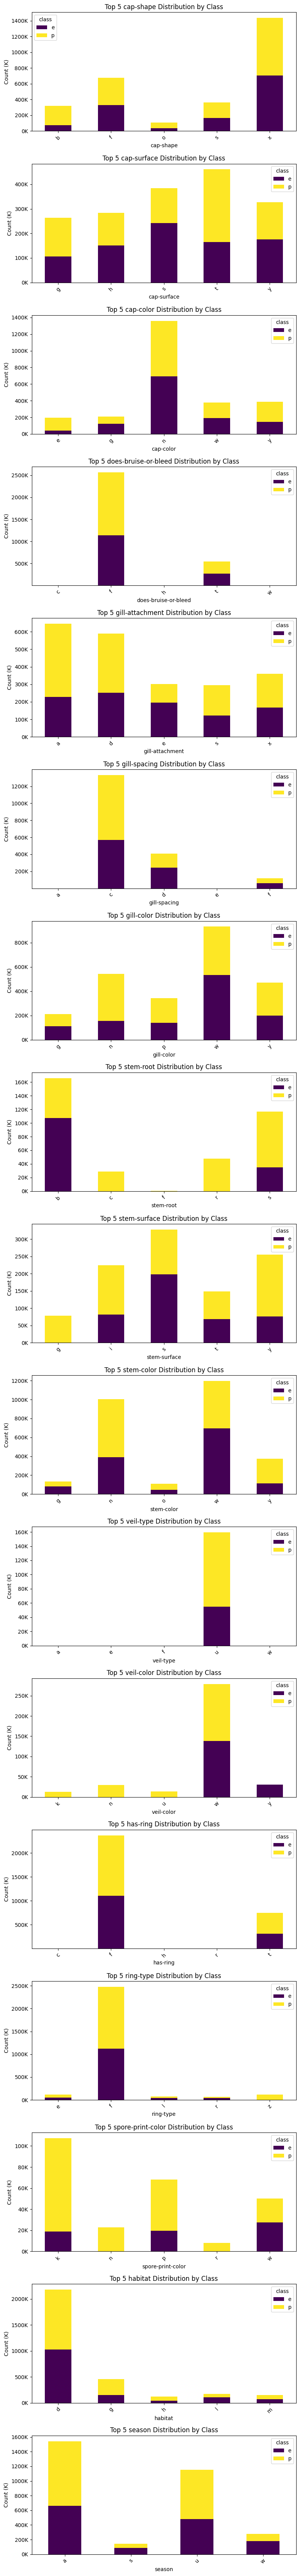

In [15]:
#DISTRIBUTION OF CATEGORICAL FEATURES OF TOP 5 CATEGORIES 
target_column = 'class'

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != target_column]

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, 4 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    top_categories = df[col].value_counts().nlargest(5).index

    filtered_df = df[df[col].isin(top_categories)]

    cross_tab = pd.crosstab(filtered_df[col], filtered_df[target_column])

    ax = axes[i]
    cross_tab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
    ax.set_title(f'Top 5 {col} Distribution by Class')
    ax.set_ylabel('Count (K)')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    ticks_loc = ax.get_yticks().tolist()
    ax.set_yticklabels(['{:.0f}K'.format(x/1000) for x in ticks_loc])

plt.tight_layout()
plt.show()


**DATA CLEANING**

In [16]:
#DROPPING THE VEIL-TYPE COLUMN AS THERE WERE MANY NULL VALUES AMD WAS NOT IMPROVING THE ACCURACY
df=df.drop(['veil-type'],axis=1)
df2=df2.drop(['veil-type'],axis=1)


In [17]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,f,f,NaN,g,a


# **HANDLING NUMERICAL DATA**

* I have replacd NaN with median.
* I have applied log normal transformation as these features were not normally distributed as they were right skewed.
* I have also added code to remove the outliers i.e. the data points which are 3 std dev away but surprisingly removing the outliers  was not advantageous in this case.

**HANDLING CAP DIAMETER**

In [18]:
#Imputing null values with mean
median_value = df['cap-diameter'].median()
df['cap-diameter'].fillna(median_value, inplace=True)
df2['cap-diameter'].fillna(median_value, inplace=True)



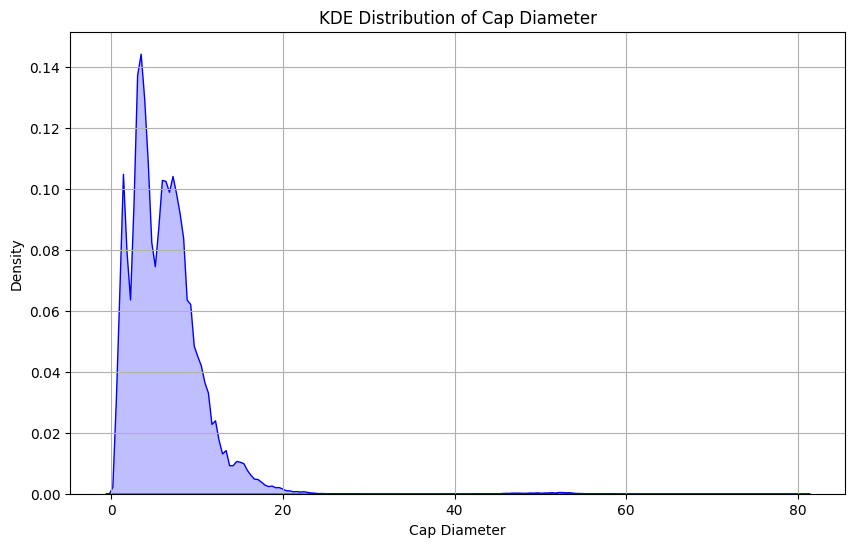

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['cap-diameter'], shade=True, color='blue')
plt.title('KDE Distribution of Cap Diameter')
plt.xlabel('Cap Diameter')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [20]:
#Applying log normal transformation to get gaussian distribution
df['cap-diameter'] = df['cap-diameter'] + 1e-6  # Adding a small constant to avoid log(0)
df2['cap-diameter'] = df2['cap-diameter'] + 1e-6  # Adding a small constant to avoid log(0)

# Apply log-normal transformation
df['cap-diameter'] = np.log(df['cap-diameter'])
df2['cap-diameter'] = np.log(df2['cap-diameter'])

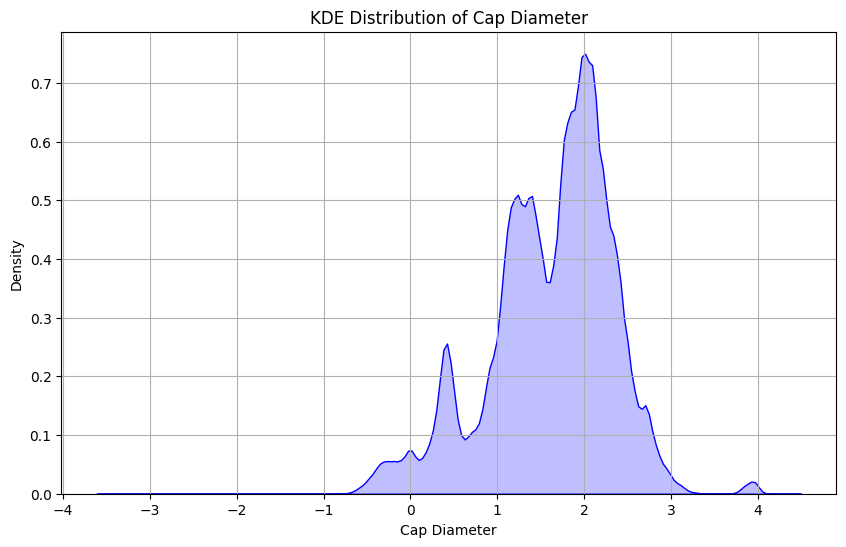

In [21]:



plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['cap-diameter'], shade=True, color='blue')
plt.title('KDE Distribution of Cap Diameter')
plt.xlabel('Cap Diameter')
plt.ylabel('Density')
plt.grid(True)
plt.show()

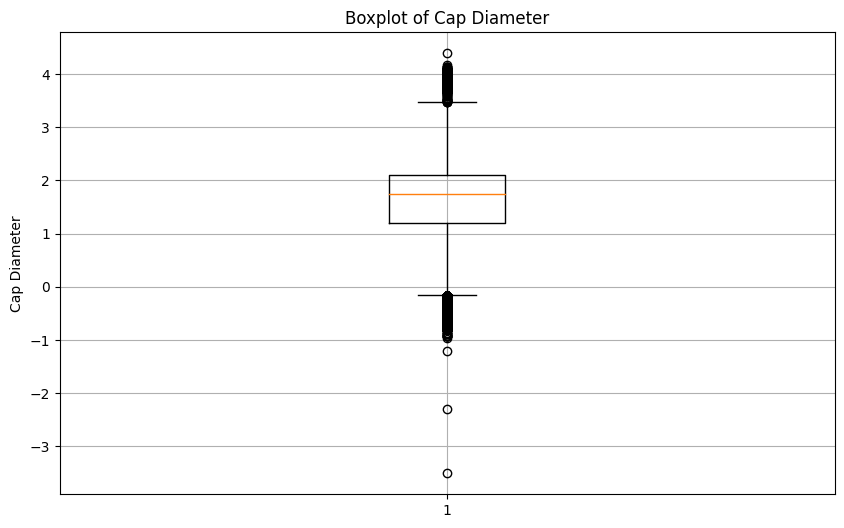

In [22]:



# Plotting the boxplot for 'cap-diameter'
plt.figure(figsize=(10, 6))
plt.boxplot(df['cap-diameter'])
plt.title('Boxplot of Cap Diameter')
plt.ylabel('Cap Diameter')
plt.grid(True)
plt.show()


In [23]:
# #IMP
# #Removing the outliers which is 3 standard dev away
# # Calculate mean and standard deviation
# mean_diameter = df['cap-diameter'].mean()
# std_diameter = df['cap-diameter'].std()

# # Define the boundaries: mean ± 3 standard deviations
# lower_boundary = mean_diameter - 3 * std_diameter
# upper_boundary = mean_diameter + 3 * std_diameter

# # Filtering the DataFrame to remove values outside the boundaries
# df = df[(df['cap-diameter'] >= lower_boundary) & (df['cap-diameter'] <= upper_boundary)]

# print(f'Lower Boundary: {lower_boundary}')
# print(f'Upper Boundary: {upper_boundary}')
# df.shape

In [24]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,2.174752,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,f,f,NaN,d,a
1,p,1.506297,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,t,z,NaN,d,w
2,e,1.937302,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,f,f,NaN,l,w
3,e,1.355835,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,f,f,NaN,d,u
4,e,1.766442,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,f,f,NaN,g,a


**HANDLING STEM HEIGHT**

In [25]:
#Imputing null values with median
median_value = df['stem-height'].median()
df['stem-height'].fillna(median_value, inplace=True)
df2['stem-height'].fillna(median_value, inplace=True)



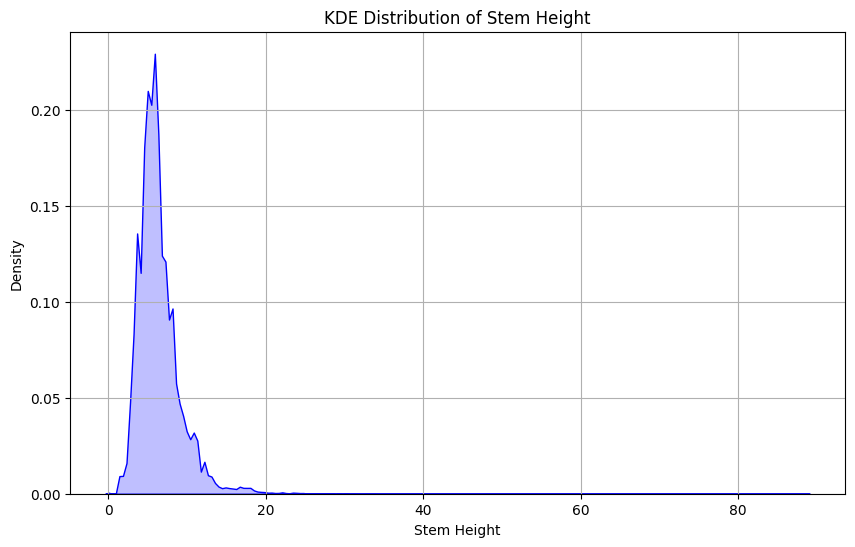

In [26]:

#Checking the distribution
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['stem-height'], shade=True, color='blue')
plt.title('KDE Distribution of Stem Height')
plt.xlabel('Stem Height')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [27]:
#Applying log normal transformation to get gaussian distribution
df['stem-height'] = df['stem-height'] + 1e-6  # Adding a small constant to avoid log(0)
df2['stem-height'] = df2['stem-height'] + 1e-6  # Adding a small constant to avoid log(0)

# Apply log-normal transformation
df['stem-height'] = np.log(df['stem-height'])
df2['stem-height'] = np.log(df2['stem-height'])

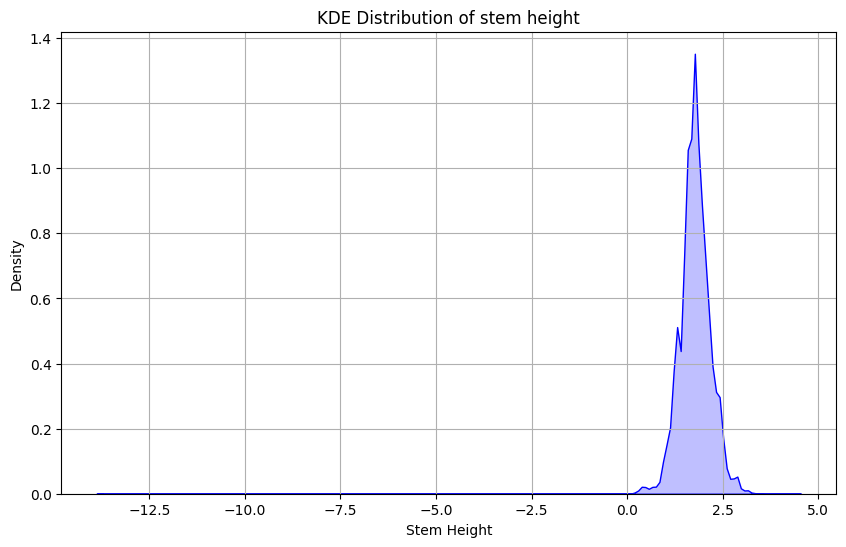

In [28]:


#Checking the distribution
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['stem-height'], shade=True, color='blue')
plt.title('KDE Distribution of stem height')
plt.xlabel('Stem Height')
plt.ylabel('Density')
plt.grid(True)
plt.show()


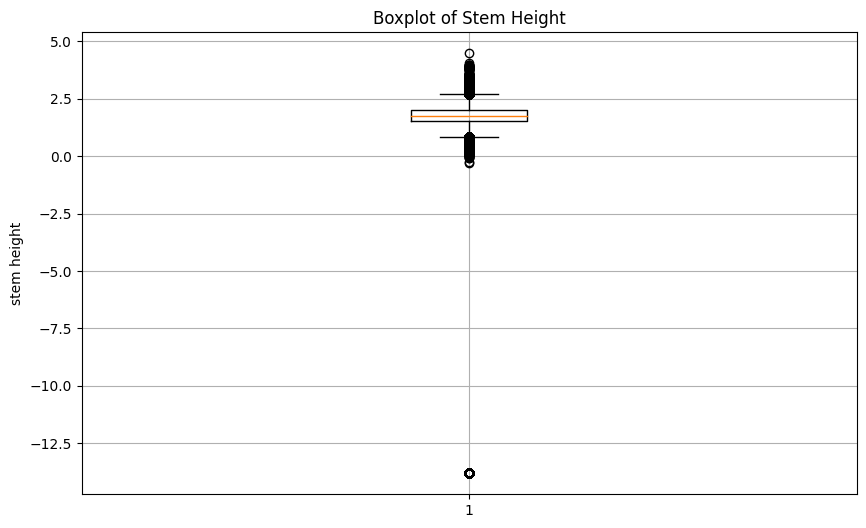

In [29]:
# Plotting the boxplot for 'stem-height'
plt.figure(figsize=(10, 6))
plt.boxplot(df['stem-height'])
plt.title('Boxplot of Stem Height')
plt.ylabel('stem height')
plt.grid(True)
plt.show()

In [30]:
df.shape

(3116945, 20)

In [31]:
# #Removing the outliers which is 3 standard dev away
# # Calculate mean and standard deviation
# mean_diameter = df['stem-height'].mean()
# std_diameter = df['stem-height'].std()

# # Define the boundaries: mean ± 3 standard deviations
# lower_boundary = mean_diameter - 3 * std_diameter
# upper_boundary = mean_diameter + 3 * std_diameter

# # Filter the DataFrame to remove values outside the boundaries
# df = df[(df['stem-height'] >= lower_boundary) & (df['stem-height'] <= upper_boundary)]

# print(f'Lower Boundary: {lower_boundary}')
# print(f'Upper Boundary: {upper_boundary}')
# df.shape

**HANDLING STEM WIDTH**

In [32]:
#Imputing null values with median
median_value = df['stem-width'].median()
df['stem-width'].fillna(median_value, inplace=True)
df2['stem-width'].fillna(median_value, inplace=True)



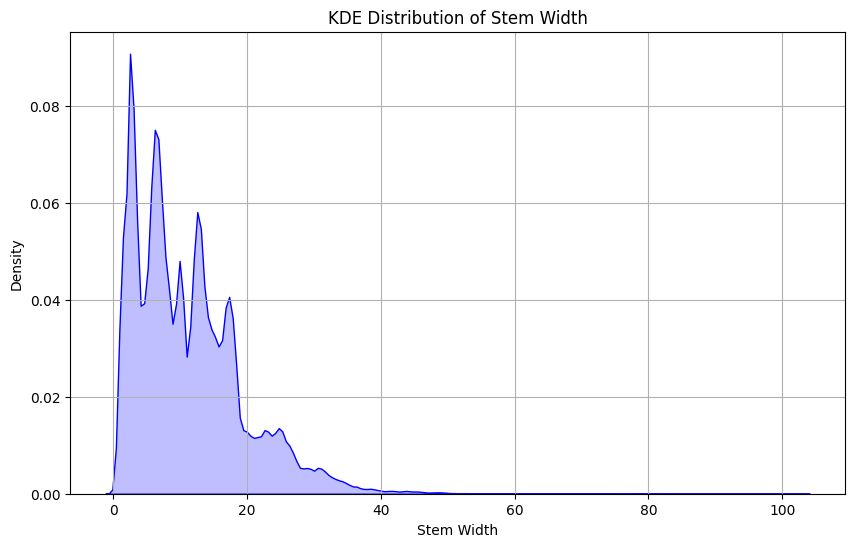

In [33]:

#Checking the distribution
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['stem-width'], shade=True, color='blue')
plt.title('KDE Distribution of Stem Width')
plt.xlabel('Stem Width')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [34]:
#Applying log normal transformation to get gaussian distribution
df['stem-width'] = df['stem-width'] + 1e-6  # Adding a small constant to avoid log(0)
df2['stem-width'] = df2['stem-width'] + 1e-6  # Adding a small constant to avoid log(0)

# Apply log-normal transformation
df['stem-width'] = np.log(df['stem-width'])
df2['stem-width'] = np.log(df2['stem-width'])

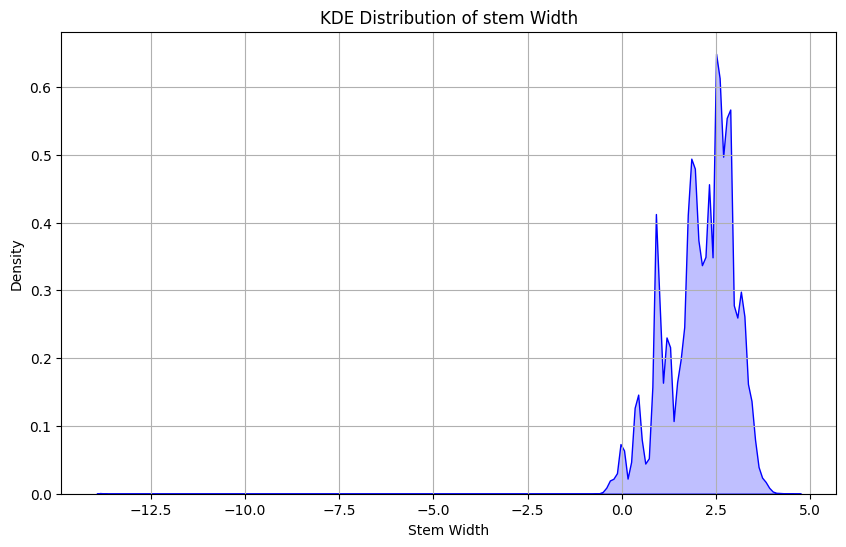

In [35]:


#Checking the distribution
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['stem-width'], shade=True, color='blue')
plt.title('KDE Distribution of stem Width')
plt.xlabel('Stem Width')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [36]:

##IMP


# # Plotting the boxplot for 'stem-width'
# plt.figure(figsize=(10, 6))
# plt.boxplot(df['stem-width'])
# plt.title('Boxplot of Stem width')
# plt.ylabel('stem width')
# plt.grid(True)
# plt.show()

In [37]:
df.shape

(3116945, 20)

In [38]:
# #Removing the outliers which is 3 standard dev away
# # Calculate mean and standard deviation
# mean_diameter = df['stem-width'].mean()
# std_diameter = df['stem-width'].std()

# # Define the boundaries: mean ± 3 standard deviations
# lower_boundary = mean_diameter - 3 * std_diameter
# upper_boundary = mean_diameter + 3 * std_diameter

# # Filter the DataFrame to remove values outside the boundaries
# df = df[(df['stem-width'] >= lower_boundary) & (df['stem-width'] <= upper_boundary)]

# print(f'Lower Boundary: {lower_boundary}')
# print(f'Upper Boundary: {upper_boundary}')
# df.shape

In [39]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,2.174752,f,s,u,f,a,c,w,1.506297,2.733718,NaN,NaN,w,NaN,f,f,NaN,d,a
1,p,1.506297,x,h,o,f,a,c,n,1.566531,1.868721,NaN,y,o,NaN,t,z,NaN,d,w
2,e,1.937302,f,s,b,f,x,c,w,1.924249,2.295561,NaN,s,n,NaN,f,f,NaN,l,w
3,e,1.355835,f,y,g,f,s,NaN,g,1.425515,1.876407,NaN,NaN,w,NaN,f,f,NaN,d,u
4,e,1.766442,x,l,w,f,d,NaN,w,1.214913,2.123459,NaN,NaN,w,NaN,f,f,NaN,g,a


# **HANDLING CATEGORICAL FEATURES**
* I have imputed the missing value with the mode.
* I cleaned the columns by replacing the categories which were by mistake with the most frequent categories 
* Applied one hot encoding to the most frequent categories and also made a new column which says whether the data in the numerical feature is missing or not.

In [40]:
#FUNCTION FOR ONE HOT ENCODING
def one_hot_encode(df, column_name, categories):
    # Creating a new DataFrame with the specified categories
    df_encoded = pd.DataFrame(0, index=df.index, columns=[f"{column_name}_{cat}" for cat in categories])

    # Performing one-hot encoding for the specified categories
    for category in categories:
        df_encoded[f"{column_name}_{category}"] = (df[column_name] == category).astype(int)
    
    # Dropping the original column and concatenate the new encoded columns
    df = df.drop(column_name, axis=1)
    df = pd.concat([df, df_encoded], axis=1)

    return df

**HANDLING SPORE COLOR**

In [41]:
print(df['spore-print-color'].value_counts().to_string())

spore-print-color
k             107310
p              68237
w              50173
n              22646
r               7975
u               7256
g               3492
y                 36
s                 21
c                 16
f                 14
e                 14
a                 13
t                 13
d                  9
l                  8
b                  5
m                  4
h                  3
o                  3
veil-color         2
i                  2
x                  2
2.49               1
9 None             1
10 None            1
class              1
2.62               1
season             1
9.55               1
6.36               1
4.58               1


In [42]:
print(df2['spore-print-color'].value_counts().to_string())

spore-print-color
k             71573
p             45452
w             33657
n             15081
r              5305
u              4845
g              2323
y                18
f                11
s                10
e                 9
o                 8
b                 7
d                 6
a                 6
l                 5
t                 5
z                 5
c                 3
h                 3
i                 3
veil-color        1
17.72             1
8.82              1
2.52              1
6.14              1
27.48             1
ring-type         1
x                 1
26.48             1
3.65              1
4                 1
2.92              1


In [43]:
spore_print_color_mode = df['spore-print-color'].mode()[0]
df['spore_print_color_missing'] = df['spore-print-color'].isnull().astype(int)
df['spore-print-color'].fillna(spore_print_color_mode, inplace=True)
print(df[['spore-print-color', 'spore_print_color_missing']].head())


  spore-print-color  spore_print_color_missing
0                 k                          1
1                 k                          1
2                 k                          1
3                 k                          1
4                 k                          1


In [44]:
spore_print_color_mode = df['spore-print-color'].mode()[0]
df2['spore_print_color_missing'] = df2['spore-print-color'].isnull().astype(int)
df2['spore-print-color'].fillna(spore_print_color_mode, inplace=True)
print(df2[['spore-print-color', 'spore_print_color_missing']].head())


  spore-print-color  spore_print_color_missing
0                 k                          1
1                 k                          1
2                 k                          1
3                 k                          1
4                 k                          1


In [45]:

categories = ['k','p','n','w','r','u','g']

df = one_hot_encode(df, 'spore-print-color', categories)
df2 = one_hot_encode(df2, 'spore-print-color', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     e      2.174752         f           s         u                    f   
1     p      1.506297         x           h         o                    f   
2     e      1.937302         f           s         b                    f   
3     e      1.355835         f           y         g                    f   
4     e      1.766442         x           l         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  habitat season  \
0               a            c          w     1.506297  ...        d      a   
1               a            c          n     1.566531  ...        d      w   
2               x            c          w     1.924249  ...        l      w   
3               s          NaN          g     1.425515  ...        d      u   
4               d          NaN          w     1.214913  ...        g      a   

  spore_print_color_missing

**HANDLING VEIL COLOR**

In [46]:
print(df['veil-color'].value_counts().to_string())

veil-color
w       279070
y        30473
n        30039
u        14026
k        13080
e         9169
g           30
p           23
r           14
o           13
s           11
t            7
a            7
d            6
i            6
h            5
f            4
c            4
l            4
b            3
8.25         1
2.49         1
z            1
3.32         1


In [47]:
print(df2['veil-color'].value_counts().to_string())

veil-color
w       186432
y        20782
n        20256
u         9413
k         8706
e         6147
g           20
p           18
t            9
d            9
r            8
h            7
s            6
o            5
i            4
b            4
f            4
a            4
l            2
m            1
4.02         1
9            1
c            1


In [48]:
df['veil-color'].isnull().sum()

2740947

In [49]:


veil_color_mode = df['veil-color'].mode()[0]

df['veil_color_missing'] = df['veil-color'].isnull().astype(int)

df['veil-color'].fillna(veil_color_mode, inplace=True)

print(df[['veil-color', 'veil_color_missing']].head())


  veil-color  veil_color_missing
0          w                   1
1          w                   1
2          w                   1
3          w                   1
4          w                   1


In [50]:
veil_color_mode = df['veil-color'].mode()[0]
df2['veil_color_missing'] = df2['veil-color'].isnull().astype(int)
df2['veil-color'].fillna(veil_color_mode, inplace=True)
print(df2[['veil-color', 'veil_color_missing']].head())


  veil-color  veil_color_missing
0          w                   0
1          w                   1
2          w                   1
3          n                   0
4          y                   0


In [51]:

categories = ['w','y','n','u','k','e']

df = one_hot_encode(df, 'veil-color', categories)
df2 = one_hot_encode(df2, 'veil-color', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     e      2.174752         f           s         u                    f   
1     p      1.506297         x           h         o                    f   
2     e      1.937302         f           s         b                    f   
3     e      1.355835         f           y         g                    f   
4     e      1.766442         x           l         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  \
0               a            c          w     1.506297  ...   
1               a            c          n     1.566531  ...   
2               x            c          w     1.924249  ...   
3               s          NaN          g     1.425515  ...   
4               d          NaN          w     1.214913  ...   

   spore-print-color_r spore-print-color_u spore-print-color_g  \
0                    0                   0               

**HANDLING STEM ROOT**

In [52]:
print(df['stem-root'].value_counts().to_string())

stem-root
b                    165801
s                    116946
r                     47803
c                     28592
f                       597
d                        24
y                        14
g                        12
w                        12
p                        12
k                        11
l                        10
t                        10
n                        10
x                         9
i                         8
u                         8
a                         7
e                         6
o                         5
h                         4
m                         4
z                         2
5.59                      1
2.77                      1
20.01                     1
3.63                      1
10.87                     1
16.88                     1
15.69                     1
3.23                      1
1.48                      1
20.0                      1
18.06                     1
spore-print-color         1
3.49      

In [53]:
print(df2['stem-root'].value_counts().to_string())

stem-root
b        110581
s         78253
r         31606
c         19025
f           374
g            14
y            14
p            11
u             8
d             7
e             7
w             6
l             6
t             6
a             5
o             5
k             5
i             3
x             3
z             2
1.48          1
1.62          1
18.29         1
h             1
m             1
3.24          1
n             1
13.46         1
2.82          1
3.59          1
24.73         1


In [54]:
df['stem-root'].isnull().sum()

2757023

In [55]:
stem_root_mode = df['stem-root'].mode()[0]
df['stem_root_missing'] = df['stem-root'].isnull().astype(int)
df['stem-root'].fillna(veil_color_mode, inplace=True)
print(df[['stem-root', 'stem_root_missing']].head())


  stem-root  stem_root_missing
0         w                  1
1         w                  1
2         w                  1
3         w                  1
4         w                  1


In [56]:
stem_root_mode = df['stem-root'].mode()[0]
df2['stem_root_missing'] = df2['stem-root'].isnull().astype(int)
df2['stem-root'].fillna(veil_color_mode, inplace=True)
print(df2[['stem-root', 'stem_root_missing']].head())


  stem-root  stem_root_missing
0         b                  0
1         w                  1
2         w                  1
3         w                  1
4         w                  1


In [57]:
categories = ['b','s','r','c']

df = one_hot_encode(df, 'stem-root', categories)
df2 = one_hot_encode(df2, 'stem-root', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     e      2.174752         f           s         u                    f   
1     p      1.506297         x           h         o                    f   
2     e      1.937302         f           s         b                    f   
3     e      1.355835         f           y         g                    f   
4     e      1.766442         x           l         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  veil-color_y  \
0               a            c          w     1.506297  ...             0   
1               a            c          n     1.566531  ...             0   
2               x            c          w     1.924249  ...             0   
3               s          NaN          g     1.425515  ...             0   
4               d          NaN          w     1.214913  ...             0   

  veil-color_n veil-color_u veil-color_

In [58]:
df2.shape

(2077964, 37)

**HANDLING CAP SURFACE**

In [59]:
print(df['cap-surface'].value_counts().to_string())

cap-surface
t                       460777
s                       384970
y                       327826
h                       284460
g                       263729
d                       206832
k                       128875
e                       119712
i                       113440
w                       109840
l                        44859
n                           96
f                           75
p                           59
u                           49
a                           44
m                           42
o                           39
r                           35
x                           33
c                           31
b                           18
z                            8
season                       7
ring-type                    4
class                        2
does None                    2
has-ring                     2
does t                       2
is None                      1
5.73                         1
14.04                      

In [60]:
print(df2['cap-surface'].value_counts().to_string())

cap-surface
t                    306852
s                    257190
y                    218336
h                    189737
g                    176140
d                    137675
k                     86041
e                     79918
i                     75570
w                     73109
l                     30101
f                        54
n                        50
p                        44
o                        37
a                        28
x                        27
m                        25
r                        25
u                        21
c                        19
b                        14
z                         6
spore-print-color         3
season                    3
does None                 2
6.04                      1
10.09                     1
2.97                      1
7.78                      1
class                     1
5.92                      1
5.98                      1
11.96                     1
5.05                      1
7.96    

In [61]:
df['cap-surface'].isnull().sum()

671023

In [62]:

cap_surface_mode = df['cap-surface'].mode()[0]

df['cap-surface_missing'] = df['cap-surface'].isnull().astype(int)

df['cap-surface'].fillna(cap_surface_mode, inplace=True)

print(df[['cap-surface', 'cap-surface_missing']].head())


  cap-surface  cap-surface_missing
0           s                    0
1           h                    0
2           s                    0
3           y                    0
4           l                    0


In [63]:
df2['cap-surface'].isnull().sum()

446904

In [64]:
df2['cap-surface_missing'] = df2['cap-surface'].isnull().astype(int)

df2['cap-surface'].fillna(cap_surface_mode, inplace=True)

print(df2[['cap-surface', 'cap-surface_missing']].head())

  cap-surface  cap-surface_missing
0           t                    1
1           t                    0
2           g                    0
3           t                    0
4           h                    0


In [65]:

categories = ['t', 'y', 's', 'h', 'g', 'd', 'k','e','i','w','l']

df = one_hot_encode(df, 'cap-surface', categories)
df2 = one_hot_encode(df2, 'cap-surface', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
0     e      2.174752         f         u                    f   
1     p      1.506297         x         o                    f   
2     e      1.937302         f         b                    f   
3     e      1.355835         f         g                    f   
4     e      1.766442         x         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               a            c          w     1.506297    2.733718  ...   
1               a            c          n     1.566531    1.868721  ...   
2               x            c          w     1.924249    2.295561  ...   
3               s          NaN          g     1.425515    1.876407  ...   
4               d          NaN          w     1.214913    2.123459  ...   

  cap-surface_y cap-surface_s cap-surface_h cap-surface_g cap-surface_d  \
0             0             1             0     

**HANDLING GILL ATTACHMENT**

In [66]:
print(df['gill-attachment'].value_counts().to_string())

gill-attachment
a                       646034
d                       589236
x                       360878
e                       301858
s                       295439
p                       279110
f                       119953
c                           74
u                           56
w                           37
t                           36
k                           33
y                           28
i                           25
g                           22
m                           22
b                           21
n                           20
o                           18
h                           18
l                           16
r                           10
z                            5
season                       5
3.45                         2
15.49                        1
19.65                        1
4.01                         1
8.37                         1
28.7                         1
6.32                         1
2.54                   

In [67]:
print(df2['gill-attachment'].value_counts().to_string())

gill-attachment
a                    430960
d                    392584
x                    240758
e                    201276
s                    196279
p                    186334
f                     79630
c                        53
u                        35
t                        27
w                        26
k                        20
g                        17
i                        14
n                        13
y                        12
l                        11
b                        11
o                        11
h                         9
m                         7
r                         7
season                    3
z                         3
class                     2
10.62                     1
0.93                      1
25.92                     1
4.8                       1
e s                       1
29.82                     1
1.56                      1
8.1                       1
0.88                      1
11.8                      1
12.9

In [68]:
df2['gill-attachment'].isnull().sum()

349821

In [69]:

gill_attachment_mode = df['gill-attachment'].mode()[0]

df['gill-attachment_missing'] = df['gill-attachment'].isnull().astype(int)

df['gill-attachment'].fillna(gill_attachment_mode, inplace=True)

print(df[['gill-attachment', 'gill-attachment_missing']].head())


  gill-attachment  gill-attachment_missing
0               a                        0
1               a                        0
2               x                        0
3               s                        0
4               d                        0


In [70]:

gill_attachment_mode = df['gill-attachment'].mode()[0]
df2['gill-attachment_missing'] = df2['gill-attachment'].isnull().astype(int)
df2['gill-attachment'].fillna(gill_attachment_mode, inplace=True)
print(df2[['gill-attachment', 'gill-attachment_missing']].head())


  gill-attachment  gill-attachment_missing
0               a                        1
1               a                        1
2               a                        1
3               s                        0
4               p                        0


In [71]:

categories = ['a', 'd', 's', 'e', 'x', 'p', 'f']
df = one_hot_encode(df, 'gill-attachment', categories)
df2 = one_hot_encode(df2, 'gill-attachment', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-color does-bruise-or-bleed gill-spacing  \
0     e      2.174752         f         u                    f            c   
1     p      1.506297         x         o                    f            c   
2     e      1.937302         f         b                    f            c   
3     e      1.355835         f         g                    f          NaN   
4     e      1.766442         x         w                    f          NaN   

  gill-color  stem-height  stem-width stem-surface  ... cap-surface_w  \
0          w     1.506297    2.733718          NaN  ...             0   
1          n     1.566531    1.868721            y  ...             0   
2          w     1.924249    2.295561            s  ...             0   
3          g     1.425515    1.876407          NaN  ...             0   
4          w     1.214913    2.123459          NaN  ...             0   

  cap-surface_l gill-attachment_missing gill-attachment_a

**HANDLING GILL SHAPE**

In [72]:
print(df['gill-spacing'].value_counts().to_string())

gill-spacing
c              1331054
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
g                    4
k                    4
h                    3
l                    3
y                    2
r                    2
6.67                 2
0                    2
9.01                 1
2.69                 1
3.61                 1
class                1
4.8                  1
4.04                 1
3.57                 1
i                    1
w                    1
24.38                1
cap-surface          1
0.73                 1
5.22                 1
3.92                 1
5.42                 1
12.27                1
1                    1
1.6                  1
n                    1
3.81                 1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.7                  

In [73]:
print(df2['gill-spacing'].value_counts().to_string())

gill-spacing
c            886976
d            272085
f             79223
e                11
s                10
a                10
b                 7
x                 6
p                 5
w                 4
y                 4
g                 3
m                 2
t                 2
has f             1
1.61              1
r                 1
1.46              1
2.93              1
3.42              1
i                 1
k                 1
does c            1
2.98              1
6.52              1
13.66             1
0.73              1
does None         1
1.64              1
2.44              1
4.92              1
1.68              1
2.7               1
5                 1
18.89             1


In [74]:
df['gill-spacing'].isnull().sum()

1258435

In [75]:
gill_spacing_mode = df['gill-spacing'].mode()[0]
df['gill_spacing_missing'] = df['gill-spacing'].isnull().astype(int)
df['gill-spacing'].fillna(gill_spacing_mode, inplace=True)
print(df[['gill-spacing', 'gill_spacing_missing']].head())


  gill-spacing  gill_spacing_missing
0            c                     0
1            c                     0
2            c                     0
3            c                     1
4            c                     1


In [76]:
gill_spacing_mode = df['gill-spacing'].mode()[0]
df2['gill_spacing_missing'] = df2['gill-spacing'].isnull().astype(int)
df2['gill-spacing'].fillna(gill_spacing_mode, inplace=True)
print(df[['gill-spacing', 'gill_spacing_missing']].head())


  gill-spacing  gill_spacing_missing
0            c                     0
1            c                     0
2            c                     0
3            c                     1
4            c                     1


In [77]:
categories = ['c','d','f']


df = one_hot_encode(df, 'gill-spacing', categories)
df2 = one_hot_encode(df2, 'gill-spacing', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0     e      2.174752         f         u                    f          w   
1     p      1.506297         x         o                    f          n   
2     e      1.937302         f         b                    f          w   
3     e      1.355835         f         g                    f          g   
4     e      1.766442         x         w                    f          w   

   stem-height  stem-width stem-surface stem-color  ... gill-attachment_d  \
0     1.506297    2.733718          NaN          w  ...                 0   
1     1.566531    1.868721            y          o  ...                 0   
2     1.924249    2.295561            s          n  ...                 0   
3     1.425515    1.876407          NaN          w  ...                 0   
4     1.214913    2.123459          NaN          w  ...                 1   

  gill-attachment_s gill-attachment_e gill-at

**HANDLING CAP SHAPE**

In [78]:
print(df2['cap-shape'].value_counts().to_string())

cap-shape
x               957949
f               452360
s               242698
b               211879
o                71972
p                71302
c                69436
e                   33
d                   30
t                   28
w                   27
n                   27
a                   24
y                   24
u                   18
k                   17
g                   17
l                   17
r                   16
z                    8
i                    4
m                    4
h                    3
is f                 2
7.21                 1
3.34                 1
19.76                1
0.93                 1
8.3                  1
3.32                 1
p f                  1
5 f                  1
1.25                 1
4.55                 1
ring-type            1
11.43                1
6                    1
5.59                 1
4.41                 1
3.73                 1
3.47                 1
6.75                 1
51.63                1
6

In [79]:

df.loc[:, 'cap-shape'] = df['cap-shape'].fillna('x')
df2.loc[:, 'cap-shape'] = df2['cap-shape'].fillna('x')


In [80]:
df['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [81]:
print(df['cap-shape'].value_counts().to_string())


cap-shape
x            1436066
f             676238
s             365146
b             318646
o             108835
p             106967
c             104520
d                 65
e                 60
n                 41
w                 36
t                 36
g                 34
y                 33
r                 32
a                 30
u                 27
z                 22
l                 21
i                 14
k                 13
h                  6
7 x                2
3.55               2
m                  2
4.97               2
8                  2
6.44               1
8.3                1
7.6                1
17.44              1
4.33               1
2.82               1
3.91               1
6.21               1
8.29               1
54.78              1
20.25              1
3.52               1
3.04               1
ring-type          1
10.13              1
is p               1
7.43               1
0.82               1
10.46              1
2.77               1
2.9

In [82]:
print(df2['cap-shape'].value_counts().to_string())


cap-shape
x               957980
f               452360
s               242698
b               211879
o                71972
p                71302
c                69436
e                   33
d                   30
t                   28
w                   27
n                   27
a                   24
y                   24
u                   18
k                   17
g                   17
l                   17
r                   16
z                    8
i                    4
m                    4
h                    3
is f                 2
7.21                 1
3.34                 1
19.76                1
0.93                 1
8.3                  1
3.32                 1
p f                  1
5 f                  1
1.25                 1
4.55                 1
ring-type            1
11.43                1
6                    1
5.59                 1
4.41                 1
3.73                 1
3.47                 1
6.75                 1
51.63                1
6

In [83]:
df.shape

(3116945, 58)

In [84]:
df['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [85]:
df['cap-shape'].isnull().sum()

0

In [86]:
categories = ['x', 'f', 's', 'b', 'c', 'p', 'o']
df = one_hot_encode(df, 'cap-shape', categories)
df2 = one_hot_encode(df2, 'cap-shape', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-color does-bruise-or-bleed gill-color  stem-height  \
0     e      2.174752         u                    f          w     1.506297   
1     p      1.506297         o                    f          n     1.566531   
2     e      1.937302         b                    f          w     1.924249   
3     e      1.355835         g                    f          g     1.425515   
4     e      1.766442         w                    f          w     1.214913   

   stem-width stem-surface stem-color has-ring  ... gill-spacing_c  \
0    2.733718          NaN          w        f  ...              1   
1    1.868721            y          o        t  ...              1   
2    2.295561            s          n        f  ...              1   
3    1.876407          NaN          w        f  ...              1   
4    2.123459          NaN          w        f  ...              1   

  gill-spacing_d gill-spacing_f  cap-shape_x  cap-shape_f  cap-shape_

**HANDLING STEM SURFACE**

In [87]:
print(df['stem-surface'].value_counts().to_string())


stem-surface
s                       327610
y                       255500
i                       224346
t                       147974
g                        78080
k                        73383
h                        28283
f                          512
w                           49
d                           48
e                           36
n                           34
x                           26
b                           23
c                           22
l                           20
r                           20
p                           20
u                           16
o                           15
a                           11
m                            7
season                       6
0.0                          3
10.48                        2
z                            2
does-bruise-or-bleed         2
5.56                         2
1.59                         1
25.83                        1
3.89                         1
4.34                      

In [88]:
print(df2['stem-surface'].value_counts().to_string())


stem-surface
s                       218496
y                       169462
i                       149192
t                        98982
g                        51848
k                        49075
h                        18861
f                          310
d                           41
w                           37
e                           23
r                           20
u                           13
n                           12
x                           11
c                           10
o                           10
p                            9
l                            8
a                            6
season                       5
does None                    5
m                            4
b                            4
z                            2
6.12                         2
2.95                         1
6.06                         1
2.98                         1
32.6                         1
32.63                        1
9.98                      

In [89]:
df['stem-surface'].isnull().sum()

1980861

In [90]:

stem_surface_mode = df['stem-surface'].mode()[0]

df['stem_surface_missing'] = df['stem-surface'].isnull().astype(int)

df['stem-surface'].fillna(stem_surface_mode, inplace=True)

print(df[['stem-surface', 'stem_surface_missing']].head())

  stem-surface  stem_surface_missing
0            s                     1
1            y                     0
2            s                     0
3            s                     1
4            s                     1


In [91]:

stem_surface_mode = df['stem-surface'].mode()[0]

df2['stem_surface_missing'] = df2['stem-surface'].isnull().astype(int)

df2['stem-surface'].fillna(stem_surface_mode, inplace=True)

print(df2[['stem-surface', 'stem_surface_missing']].head())

  stem-surface  stem_surface_missing
0            s                     1
1            s                     1
2            s                     1
3            s                     1
4            s                     1


In [92]:

categories = ['s', 'y', 'i', 't', 'g', 'k', 'h']


df = one_hot_encode(df, 'stem-surface', categories)
df2 = one_hot_encode(df2, 'stem-surface', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter cap-color does-bruise-or-bleed gill-color  stem-height  \
0     e      2.174752         u                    f          w     1.506297   
1     p      1.506297         o                    f          n     1.566531   
2     e      1.937302         b                    f          w     1.924249   
3     e      1.355835         g                    f          g     1.425515   
4     e      1.766442         w                    f          w     1.214913   

   stem-width stem-color has-ring ring-type  ... cap-shape_p cap-shape_o  \
0    2.733718          w        f         f  ...           0           0   
1    1.868721          o        t         z  ...           0           0   
2    2.295561          n        f         f  ...           0           0   
3    1.876407          w        f         f  ...           0           0   
4    2.123459          w        f         f  ...           0           0   

   stem_surface_missing  stem-sur

**HANDLING CAP COLOR**

In [93]:
df['cap-color'].fillna('n', inplace=True)
df2['cap-color'].fillna('n', inplace=True)


In [94]:
df['cap-color'].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

In [95]:
print(df['cap-color'].value_counts().to_string())


cap-color
n                       1359554
y                        386627
w                        379442
g                        210825
e                        197290
o                        178847
p                         91838
r                         78236
u                         73172
b                         61313
k                         59888
l                         39558
f                            53
d                            48
s                            39
a                            30
t                            26
h                            22
m                            14
c                            14
x                            14
i                            13
z                            10
season                        6
ring-type                     6
class                         5
3.34                          2
does-bruise-or-bleed          2
11.13                         2
5.41                          1
3.11                          

In [96]:
print(df2['cap-color'].value_counts().to_string())


cap-color
n                                                                                           904320
y                                                                                           259062
w                                                                                           253844
g                                                                                           140681
e                                                                                           131524
o                                                                                           119764
p                                                                                            61186
r                                                                                            51784
u                                                                                            48865
b                                                                                            40790


In [97]:
df['cap-color'].isnull().sum()

0

In [98]:
df['cap-color'].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

In [99]:
categories = ['n','w','y','g','e','o','p','r','u','b','k','l']

df = one_hot_encode(df, 'cap-color', categories)
df2 = one_hot_encode(df2, 'cap-color', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter does-bruise-or-bleed gill-color  stem-height  \
0     e      2.174752                    f          w     1.506297   
1     p      1.506297                    f          n     1.566531   
2     e      1.937302                    f          w     1.924249   
3     e      1.355835                    f          g     1.425515   
4     e      1.766442                    f          w     1.214913   

   stem-width stem-color has-ring ring-type habitat  ... cap-color_y  \
0    2.733718          w        f         f       d  ...           0   
1    1.868721          o        t         z       d  ...           0   
2    2.295561          n        f         f       l  ...           0   
3    1.876407          w        f         f       d  ...           0   
4    2.123459          w        f         f       g  ...           0   

   cap-color_g  cap-color_e  cap-color_o  cap-color_p  cap-color_r  \
0            0            0            0       

**HANDLING DOES BRUISE OR BLEED**

In [100]:
df['does-bruise-or-bleed'].isnull().sum()

8

In [101]:
df['does-bruise-or-bleed'].unique()

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', nan, 'g', 'y',
       'r', 'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e',
       '4.42', '2.9', 'u'], dtype=object)

In [102]:
df['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
b                 7
y                 7
a                 7
x                 7
s                 6
k                 6
d                 4
e                 4
p                 4
l                 4
z                 3
o                 3
g                 3
n                 2
i                 2
has-ring          1
r                 1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [103]:

df['does-bruise-or-bleed'].fillna('f', inplace=True)
df2['does-bruise-or-bleed'].fillna('f', inplace=True)


In [104]:
df['does-bruise-or-bleed'].isnull().sum()

0

In [105]:
df.shape

(3116945, 82)

In [106]:

categories = ['t', 'f']




df = one_hot_encode(df, 'does-bruise-or-bleed', categories)
df2 = one_hot_encode(df2, 'does-bruise-or-bleed', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter gill-color  stem-height  stem-width stem-color has-ring  \
0     e      2.174752          w     1.506297    2.733718          w        f   
1     p      1.506297          n     1.566531    1.868721          o        t   
2     e      1.937302          w     1.924249    2.295561          n        f   
3     e      1.355835          g     1.425515    1.876407          w        f   
4     e      1.766442          w     1.214913    2.123459          w        f   

  ring-type habitat season  ...  cap-color_e  cap-color_o  cap-color_p  \
0         f       d      a  ...            0            0            0   
1         z       d      w  ...            0            1            0   
2         f       l      w  ...            0            0            0   
3         f       d      u  ...            0            0            0   
4         f       g      a  ...            0            0            0   

   cap-color_r  cap-color_u  cap-color_

**HANDLING GILL COLOR**

In [107]:
df['gill-color'].value_counts()

gill-color
w            931538
n            543386
y            469464
p            343626
g            212164
              ...  
16.41             1
6.41              1
veil-type         1
20.44             1
8.37              1
Name: count, Length: 63, dtype: int64

In [108]:
df['gill-color'].fillna('w', inplace=True)
df2['gill-color'].fillna('w', inplace=True)


In [109]:
df['gill-color'].isnull().sum()

0

In [110]:
print(df['gill-color'].value_counts().to_string())

gill-color
w                       931595
n                       543386
y                       469464
p                       343626
g                       212164
o                       157119
k                       127970
f                       119694
r                        62799
e                        56047
b                        47247
u                        45399
l                           55
t                           54
d                           54
s                           46
x                           35
c                           31
a                           28
h                           24
z                           16
m                           16
i                            9
class                        7
season                       7
ring-type                    5
spacing                      4
has-ring                     3
5                            3
spore-print-color            3
18.03                        2
habitat                     

In [111]:
print(df2['gill-color'].value_counts().to_string())

gill-color
w                       620822
n                       362169
y                       313932
p                       229155
g                       141519
o                       105048
k                        85360
f                        79482
r                        41499
e                        37432
b                        31183
u                        30084
l                           37
d                           37
s                           30
x                           28
c                           26
t                           24
a                           20
h                           13
z                            9
m                            6
i                            5
spacing                      4
does-bruise-or-bleed         3
class                        3
season                       3
has-ring                     2
4                            2
8.95                         1
6.3                          1
19.46                       

In [112]:

categories = ['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u']
df = one_hot_encode(df, 'gill-color', categories)
df2 = one_hot_encode(df2, 'gill-color', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width stem-color has-ring ring-type  \
0     e      2.174752     1.506297    2.733718          w        f         f   
1     p      1.506297     1.566531    1.868721          o        t         z   
2     e      1.937302     1.924249    2.295561          n        f         f   
3     e      1.355835     1.425515    1.876407          w        f         f   
4     e      1.766442     1.214913    2.123459          w        f         f   

  habitat season  spore_print_color_missing  ...  gill-color_y  gill-color_p  \
0       d      a                          1  ...             0             0   
1       d      w                          1  ...             0             0   
2       l      w                          1  ...             0             0   
3       d      u                          1  ...             0             0   
4       g      a                          1  ...             0             0   

   gill-c

**HANDLING STEM COLOR**

In [113]:
df['stem-color'].value_counts()

stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
spore-print-color          2
class                      2
3.13                       1
1.75                       1
e n                        1
7.33                       1
is n                       1
2.78                       1
23.59                      1
8.32                       1
33.

In [114]:
df2['stem-color'].value_counts()

stem-color
w                       797365
n                       668156
y                       250141
g                        88202
o                        75094
e                        68804
u                        44784
p                        36356
k                        22176
r                        14910
l                         6518
b                         4895
f                          355
s                           35
a                           21
t                           21
i                           21
x                           17
h                           12
d                           12
c                            8
m                            3
z                            3
spore-print-color            3
stem-root                    1
3.05                         1
veil-color                   1
veil-type                    1
17.16                        1
8.04                         1
7.35                         1
2.96                        

In [115]:

df['stem-color'].fillna('w', inplace=True)
df2['stem-color'].fillna('w', inplace=True)


In [116]:
categories = [ 'w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b']

df = one_hot_encode(df, 'stem-color', categories)
df2 = one_hot_encode(df2, 'stem-color', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width has-ring ring-type habitat  \
0     e      2.174752     1.506297    2.733718        f         f       d   
1     p      1.506297     1.566531    1.868721        t         z       d   
2     e      1.937302     1.924249    2.295561        f         f       l   
3     e      1.355835     1.425515    1.876407        f         f       d   
4     e      1.766442     1.214913    2.123459        f         f       g   

  season  spore_print_color_missing  spore-print-color_k  ...  stem-color_y  \
0      a                          1                    1  ...             0   
1      w                          1                    1  ...             0   
2      w                          1                    1  ...             0   
3      u                          1                    1  ...             0   
4      a                          1                    1  ...             0   

   stem-color_g  stem-color_o  st

**HANDLING HAS RING**

In [117]:
df['has-ring'].isnull().sum()

24

In [118]:

df['has-ring'].fillna('f', inplace=True)
df2['has-ring'].fillna('f', inplace=True)


In [119]:
df['has-ring'].value_counts()

has-ring
f             2368844
t              747982
r                  16
h                  13
c                  11
s                  11
l                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
o                   2
k                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [120]:
categories = [ 't', 'f']

df = one_hot_encode(df, 'has-ring', categories)
df2 = one_hot_encode(df2, 'has-ring', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width ring-type habitat season  \
0     e      2.174752     1.506297    2.733718         f       d      a   
1     p      1.506297     1.566531    1.868721         z       d      w   
2     e      1.937302     1.924249    2.295561         f       l      w   
3     e      1.355835     1.425515    1.876407         f       d      u   
4     e      1.766442     1.214913    2.123459         f       g      a   

   spore_print_color_missing  spore-print-color_k  spore-print-color_p  ...  \
0                          1                    1                    0  ...   
1                          1                    1                    0  ...   
2                          1                    1                    0  ...   
3                          1                    1                    0  ...   
4                          1                    1                    0  ...   

   stem-color_o  stem-color_e  stem-color_u  

## 

**HANDLING RING TYPE**

In [121]:
df['habitat'].isnull().sum()

45

In [122]:
df['habitat'].value_counts()

habitat
d                       2177573
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
8.09                          1
17.1                          1
is w                          1
9.28                          1


In [123]:
df2['habitat'].value_counts()

habitat
d                    1450420
g                     304300
l                     114458
m                     101258
h                      80032
w                      12324
p                      11429
u                       3434
s                         39
t                         35
n                         29
e                         24
r                         21
k                         19
c                         18
a                         17
b                         11
y                         10
f                          9
x                          8
o                          7
habitat                    7
class                      5
i                          5
spore-print-color          3
has-ring                   3
4.58                       2
19.85                      1
2.53                       1
9.01                       1
4.76                       1
2.02                       1
5.84                       1
7.01                       1
5.92  

In [124]:
df['habitat'].fillna('d', inplace=True)
df2['habitat'].fillna('d', inplace=True)

In [125]:
categories = [ 'd', 'g', 'l', 'm', 'h', 'w', 'p', 'u']


df = one_hot_encode(df, 'habitat', categories)
df2 = one_hot_encode(df2, 'habitat', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width ring-type season  \
0     e      2.174752     1.506297    2.733718         f      a   
1     p      1.506297     1.566531    1.868721         z      w   
2     e      1.937302     1.924249    2.295561         f      w   
3     e      1.355835     1.425515    1.876407         f      u   
4     e      1.766442     1.214913    2.123459         f      a   

   spore_print_color_missing  spore-print-color_k  spore-print-color_p  \
0                          1                    1                    0   
1                          1                    1                    0   
2                          1                    1                    0   
3                          1                    1                    0   
4                          1                    1                    0   

   spore-print-color_n  ...  has-ring_t  has-ring_f  habitat_d  habitat_g  \
0                    0  ...           0       

**HANDLING SEASON**

In [126]:
df['season'].isnull().sum()

0

In [127]:
df['season'].fillna('a', inplace=True)
df2['season'].fillna('a', inplace=True)

In [128]:
df['season'].value_counts()

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [129]:

categories = [ 's', 'w', 'a', 'u']
df = one_hot_encode(df, 'season', categories)
df2 = one_hot_encode(df2, 'season', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width ring-type  \
0     e      2.174752     1.506297    2.733718         f   
1     p      1.506297     1.566531    1.868721         z   
2     e      1.937302     1.924249    2.295561         f   
3     e      1.355835     1.425515    1.876407         f   
4     e      1.766442     1.214913    2.123459         f   

   spore_print_color_missing  spore-print-color_k  spore-print-color_p  \
0                          1                    1                    0   
1                          1                    1                    0   
2                          1                    1                    0   
3                          1                    1                    0   
4                          1                    1                    0   

   spore-print-color_n  spore-print-color_w  ...  habitat_l  habitat_m  \
0                    0                    0  ...          0          0   
1                

**HANDLING RING TYPE**

In [130]:
df['ring-type'].value_counts()

ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
4                             1
15                            1
3.12                          1
does-bruise-or-bleed          1
11                            

In [131]:
df2['ring-type'].value_counts()

ring-type
f                    1650200
e                      80348
z                      75917
l                      48847
p                      45654
r                      45400
g                      42472
m                       2689
t                         46
d                         24
x                         21
w                         17
y                         16
n                         16
u                         14
c                         13
a                         13
s                         12
b                         12
o                          9
h                          5
k                          4
i                          4
ring-type                  4
season                     1
1                          1
3.48                       1
is p                       1
12.63                      1
10.36                      1
8.12                       1
does f                     1
18.5                       1
9.33                       1
spor

In [132]:
df['ring-type'].isnull().sum()

128880

In [133]:
ring_type_mode = df['ring-type'].mode()[0]
df['ring_type_missing'] = df['ring-type'].isnull().astype(int)
df['ring-type'].fillna(ring_type_mode, inplace=True)
print(df[['ring-type', 'ring_type_missing']].head())


  ring-type  ring_type_missing
0         f                  0
1         z                  0
2         f                  0
3         f                  0
4         f                  0


In [134]:
ring_type_mode = df['ring-type'].mode()[0]
df2['ring_type_missing'] = df2['ring-type'].isnull().astype(int)
df2['ring-type'].fillna(ring_type_mode, inplace=True)
print(df2[['ring-type', 'ring_type_missing']].head())


  ring-type  ring_type_missing
0         g                  0
1         f                  0
2         f                  0
3         z                  0
4         f                  1


In [135]:

categories = [ 'f','e','z','l','r','p','g','m']

df = one_hot_encode(df, 'ring-type', categories)
df2 = one_hot_encode(df2, 'ring-type', categories)

print("DataFrame df after encoding:")
print(df.head())

print("DataFrame df2 after encoding:")
print(df2.head())


DataFrame df after encoding:
  class  cap-diameter  stem-height  stem-width  spore_print_color_missing  \
0     e      2.174752     1.506297    2.733718                          1   
1     p      1.506297     1.566531    1.868721                          1   
2     e      1.937302     1.924249    2.295561                          1   
3     e      1.355835     1.425515    1.876407                          1   
4     e      1.766442     1.214913    2.123459                          1   

   spore-print-color_k  spore-print-color_p  spore-print-color_n  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   spore-print-color_w  spore-print-color_r  ...  season_u  ring_type_missing  \
0                 

In [136]:
df.head()

,class,cap-diameter,stem-height,stem-width,spore_print_color_missing,spore-print-color_k,spore-print-color_p,spore-print-color_n,spore-print-color_w,spore-print-color_r,...,season_u,ring_type_missing,ring-type_f,ring-type_e,ring-type_z,ring-type_l,ring-type_r,ring-type_p,ring-type_g,ring-type_m
0,e,2.174752,1.506297,2.733718,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,p,1.506297,1.566531,1.868721,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,e,1.937302,1.924249,2.295561,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,e,1.355835,1.425515,1.876407,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,e,1.766442,1.214913,2.123459,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [137]:
df2.head()

,id,cap-diameter,stem-height,stem-width,spore_print_color_missing,spore-print-color_k,spore-print-color_p,spore-print-color_n,spore-print-color_w,spore-print-color_r,...,season_u,ring_type_missing,ring-type_f,ring-type_e,ring-type_z,ring-type_l,ring-type_r,ring-type_p,ring-type_g,ring-type_m
0,3116945,2.156403,2.409644,2.840247,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3116946,1.931522,0.239018,2.374906,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3116947,0.693148,1.821318,1.144223,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3116948,1.244155,1.605430,2.141242,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3116949,1.819699,1.906575,2.617396,1,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


# **SPLITTING THE DATASET**
* Splitting the data into train and validation as 95:5 the data is very large.

In [138]:
y = df.iloc[:, 0] 
X = df.iloc[:, 1:]  
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   cap-diameter  stem-height  stem-width  spore_print_color_missing  \
0      2.174752     1.506297    2.733718                          1   
1      1.506297     1.566531    1.868721                          1   
2      1.937302     1.924249    2.295561                          1   
3      1.355835     1.425515    1.876407                          1   
4      1.766442     1.214913    2.123459                          1   

   spore-print-color_k  spore-print-color_p  spore-print-color_n  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   spore-print-color_w  spore-print-color_r  spore-print-color_u  ...  \
0                    0                    0                    0  ...   
1   

In [139]:
# Label encoding the target variable y: 'e' -> 0 and 'p' -> 1
y = y.map({'e': 0, 'p': 1})
print(y.head())


0    0
1    1
2    0
3    0
4    0
Name: class, dtype: int64


In [140]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=50,stratify=y)

print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)


Training features shape: (2961097, 123)
Validation features shape: (155848, 123)
Training target shape: (2961097,)
Validation target shape: (155848,)


**SCALING THE NUMERICAL FEATURES**

In [141]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']
standard_scaler = StandardScaler()
X_train[numerical_columns] = standard_scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = standard_scaler.transform(X_val[numerical_columns])


In [142]:
# Counting the number of 0 and 1 labels in y_train and y_val
train_label_counts = y_train.value_counts()
val_label_counts = y_val.value_counts()

print("Label counts in y_train:")
print(train_label_counts)

print("\nLabel counts in y_val:")
print(val_label_counts)


Label counts in y_train:
class
1    1620126
0    1340971
Name: count, dtype: int64

Label counts in y_val:
class
1    85270
0    70578
Name: count, dtype: int64


# **MODEL TRAINING AND EVALUATION**
* I tried 3 models XGBOOST, CATBOOST and DEEP NEURAL NETWORKS and found XGBOOST the best one
* I have used optuna for tuning the hyperparameters.
* Optuna is an open-source hyperparameter optimization framework designed to automate the process of hyperparameter tuning in machine learning models. It provides an efficient and flexible way to find the best hyperparameters for algorithms by using sophisticated optimization techniques.
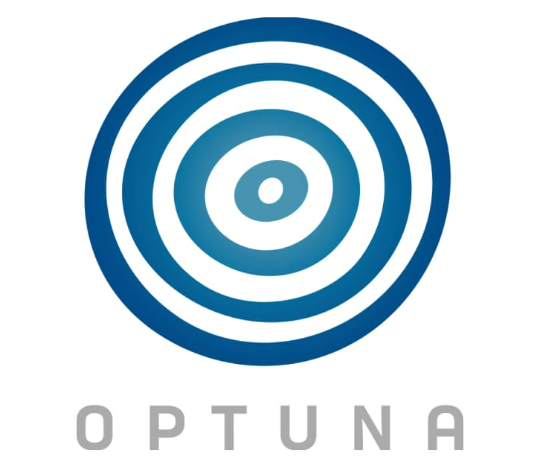


**XGBOOST**

In [ ]:
# #Hyperparameter tuning with OPTUNA
# import optuna
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, matthews_corrcoef
# from sklearn.model_selection import train_test_split

# # Define your objective function for Optuna
# def objective(trial):
#     # Define the hyperparameter search space
#     params = {
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.3, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
#         'tree_method': 'gpu_hist',  # Use GPU
#         'gpu_id': 0
#     }

#     # Initialize XGBoost Classifier with current trial's hyperparameters
#     xgb_clf = xgb.XGBClassifier(**params)

#     # Train the classifier
#     xgb_clf.fit(X_train, y_train)

#     # Predict on the validation set
#     y_pred = xgb_clf.predict(X_val)

#     # Calculate the Matthews correlation coefficient (MCC)
#     mcc = matthews_corrcoef(y_val, y_pred)

#     return mcc  # Optuna will maximize this value

# # Create a study object and specify that we want to maximize the MCC
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# # Output the best trial results
# print(f"Best trial: MCC {study.best_trial.value:.4f}, Parameters: {study.best_trial.params}")






In [143]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, matthews_corrcoef

# HYPERPARAMETERS ARE TUNED USING OPTUNA
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.03866478165917683,
    max_depth=15,
    n_estimators=537,
    subsample=0.5308198191299447,
    colsample_bytree=0.39780439228131836,
    gamma=0.00317117984524131,
    reg_alpha=0.00013252041342870703,
    reg_lambda=8.600311922560845e-07,
    tree_method='gpu_hist', 
    gpu_id=0,
    objective='binary:logistic'
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
mcc = matthews_corrcoef(y_val, y_pred)
print(f"XGBoost Classifier - Accuracy: {accuracy:.4f}, MCC: {mcc:.4f}")






XGBoost Classifier - Accuracy: 0.9924, MCC: 0.9847


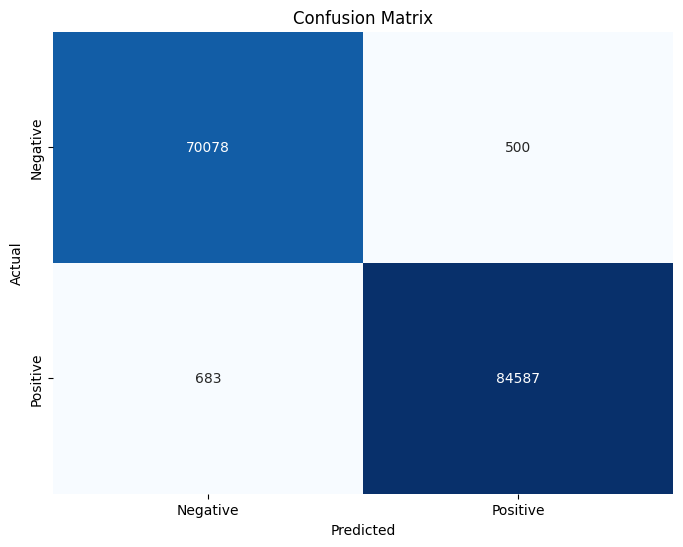

In [145]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [150]:
#PRECISION, RECALL, F1 SCORE
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the results
print(f"XGBoost Classifier - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


XGBoost Classifier - Precision: 0.9941, Recall: 0.9920, F1 Score: 0.9931


**CATBOOST**

In [ ]:

##CATBOOST



# #Catboost
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, matthews_corrcoef

# # Initialize the CatBoost Classifier with some basic parameters
# catboost_clf = CatBoostClassifier(iterations=1500,  # Number of boosting iterations
#                                   depth=13,          # Depth of the tree
#                                   learning_rate=0.05, # Learning rate
#                                   verbose=100,      # Logging frequency
#                                   task_type='GPU',
#                                   devices=[0,1],
# #                                   eval_metric='Logloss',
#                                   max_bin=300
# #                                   scale_pos_weight=0.825,
# #                                   grow_policy='Lossguide'
# #                                   bagging_temperature=0.6,
# #                                   random_strength=0.6,
# #                                   border_count=300
                            
#                                   )     

# # Train the classifier on the training data
# catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# # Predict on the validation set
# y_pred = catboost_clf.predict(X_val)

# # Calculate accuracy and Matthews correlation coefficient
# accuracy = accuracy_score(y_val, y_pred)
# mcc = matthews_corrcoef(y_val, y_pred)

# # Print the results
# print(f"CatBoost Classifier - Accuracy: {accuracy:.4f}, MCC: {mcc:.4f}")



#TUNING CATBBOST WITH OPTUNA
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, matthews_corrcoef

# def objective(trial):
#     # Define the hyperparameter search space
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 2000),
#         'depth': trial.suggest_int('depth', 4, 16),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 100),
#         'border_count': trial.suggest_int('border_count', 32, 350),
#         'random_strength': trial.suggest_loguniform('random_strength', 1e-5, 1e+3),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
# #         'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Lossguide', 'Depthwise']),
# #         'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'Poisson'])
#     }

#     # Initialize CatBoost Classifier with current trial's hyperparameters
#     catboost_clf = CatBoostClassifier(
#         iterations=params['iterations'],
#         depth=params['depth'],
#         learning_rate=params['learning_rate'],
#         l2_leaf_reg=params['l2_leaf_reg'],
#         border_count=params['border_count'],
#         random_strength=params['random_strength'],
#         min_data_in_leaf=params['min_data_in_leaf'],
#         #grow_policy=params['grow_policy'],
#         #bootstrap_type=params['bootstrap_type'],  # Use supported bootstrap types
#         task_type='GPU',
#         devices=[0,1]  # Adjust if you want to use multiple GPUs
#     )

#     # Train the classifier
#     catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

#     # Predict on the validation set
#     y_pred = catboost_clf.predict(X_val)

#     # Calculate the Matthews correlation coefficient (MCC)
#     mcc = matthews_corrcoef(y_val, y_pred)

#     return mcc  # Optuna will maximize this value

# # Create a study object and specify that we want to maximize the MCC
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# # Output the best trial results
# print(f"Best trial: MCC {study.best_trial.value:.4f}, Parameters: {study.best_trial.params}")

# # Train the CatBoost model with the best parameters found by Optuna
# best_params = study.best_trial.params
# best_catboost_clf = CatBoostClassifier(
#     iterations=best_params['iterations'],
#     depth=best_params['depth'],
#     learning_rate=best_params['learning_rate'],
#     l2_leaf_reg=best_params['l2_leaf_reg'],
#     border_count=best_params['border_count'],
#     random_strength=best_params['random_strength'],
#     min_data_in_leaf=best_params['min_data_in_leaf'],
#     #grow_policy=best_params['grow_policy'],
#     #bootstrap_type=best_params['bootstrap_type'],  # Ensure this matches
#     task_type='GPU',
#     devices=[0, 1]  # Adjust if you want to use multiple GPUs
# )
# best_catboost_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

# # Predict on the validation set with the best model
# y_pred_best = best_catboost_clf.predict(X_val)

# # Calculate accuracy and Matthews correlation coefficient for the best model
# accuracy_best = accuracy_score(y_val, y_pred_best)
# mcc_best = matthews_corrcoef(y_val, y_pred_best)

# # Print the results for the best model
# print(f"Best CatBoost Classifier - Accuracy: {accuracy_best:.4f}, MCC: {mcc_best:.4f}")


**Testing the model on test data and creating submission file**

In [ ]:
# Recreate X_test to ensure proper alignment
X_test = df2.drop('id', axis=1)



#Scaling test data
X_test[numerical_columns] =standard_scaler.transform(X_test[numerical_columns])
# Make predictions using the Gradient Boosting model
y_pred_test = xgb_clf.predict(X_test)

# Map numeric predictions to original classes 'e' and 'p'
label_mapping = {0: 'e', 1: 'p'}
predicted_classes = pd.Series(y_pred_test).map(label_mapping)

# Recreate submission DataFrame ensuring proper alignment
submission = pd.DataFrame({
    'id': df2['id'].values,   # Ensure to use the original 'id' column
    'class': predicted_classes  # The mapped predictions
})

# Check again for any missing 'id' values in the submission
print(f"Any missing 'id' in submission: {submission['id'].isnull().any()}")

# Optional: Check the count of non-null 'id' values again
num_ids_submission = submission['id'].notnull().sum()
print(f"Number of non-null 'id' values in submission: {num_ids_submission}")

# Save the submission DataFrame to a CSV file
submission.to_csv('submission1111.csv', index=False)
print("Submission file created successfully!")
